# AST 7939 Week 6

## Emsemble Methods

In [6]:
import numpy as np

### Bagging

Text(0, 0.5, 'Feature 2')

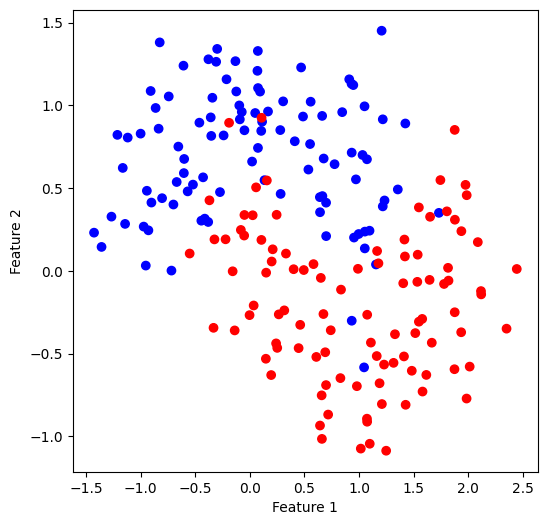

In [1]:
from sklearn import datasets
#import mglearn
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))

X, y = datasets.make_moons(n_samples=200, noise=0.3, random_state=3)

#mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")

### Let's build a Decision Tree and check the accuracy.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = DecisionTreeClassifier(random_state=0)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.82

### This is the decision boundary.

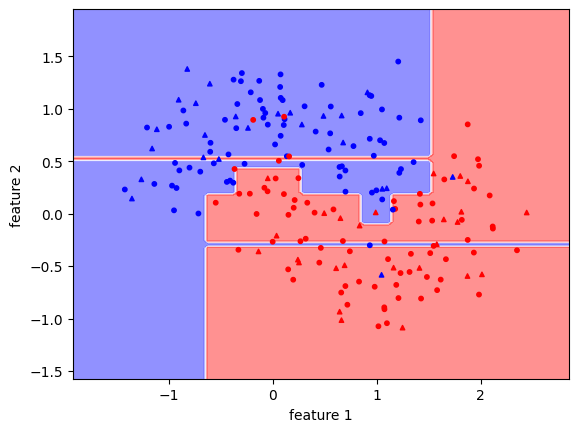

In [3]:
import numpy as np

def plot_decision_boundary(model, X, y, alpha=0.5, contour=True, marker=None):
    xx = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
    yy = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100)

    XX, YY = np.meshgrid(xx, yy)
    Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)

    if contour:
        plt.contourf(XX, YY, Z, alpha=alpha, cmap='bwr')
    
    if marker == None:
        plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='bwr')
    else:
        plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='bwr', marker=marker)
        
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    
plot_decision_boundary(model, X_train, y_train)
plot_decision_boundary(model, X_test, y_test, contour=False, marker='^')

### Bootstrap

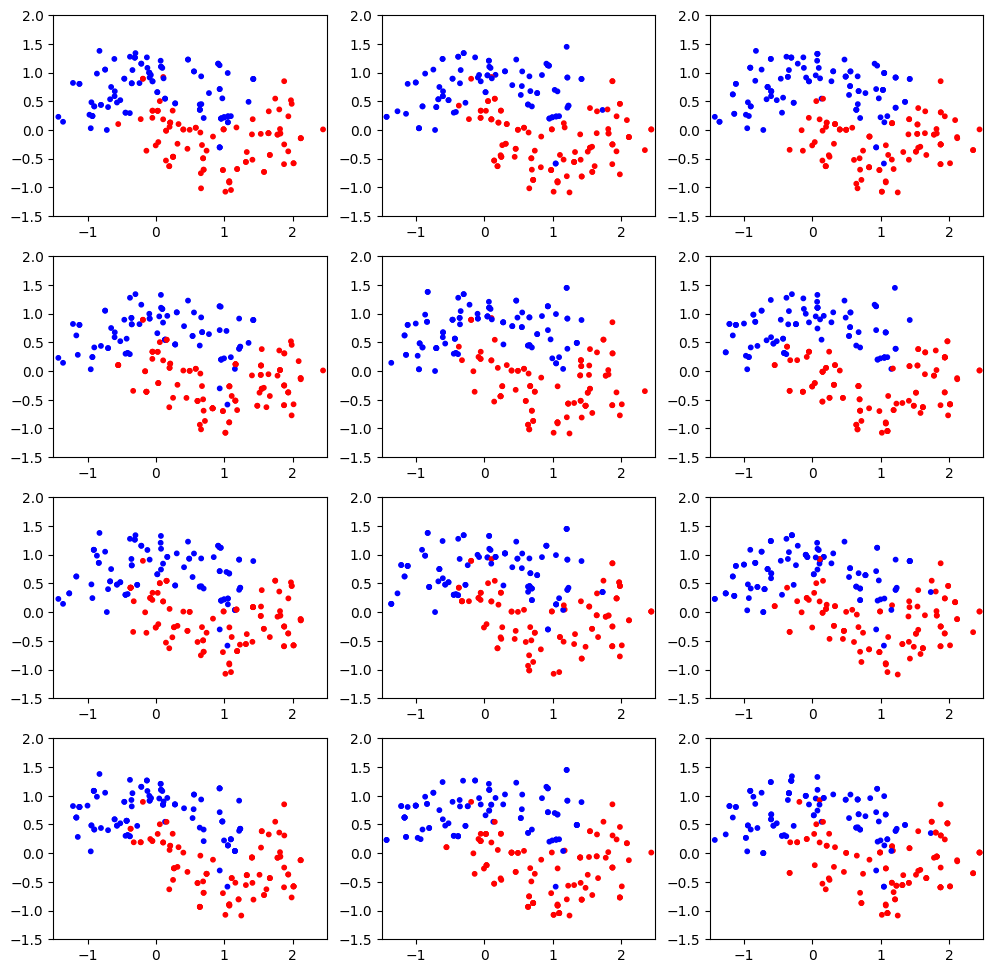

In [4]:
import numpy as np

npanel = 12

fig, axs = plt.subplots(4, 3, figsize=(12, 12))
axs = axs.ravel()

#mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = axs[0], s=5)

for i in np.arange(npanel):
    # This is where bootstrap is happening.
    indices_with_replacement = np.random.randint(0, len(X), len(X))
    
    X_new = X[indices_with_replacement]
    y_new = y[indices_with_replacement]

#    mglearn.discrete_scatter(X_new[:, 0], X_new[:, 1], y_new, ax = axs[i+1], s=5)
    axs[i].scatter(X_new[:, 0], X_new[:, 1], c=y_new, s=10, cmap='bwr')
    axs[i].set_xlim(-1.5,2.5)
    axs[i].set_ylim(-1.5,2.)
    
plt.savefig('bootstrap.png',dpi=300)

In [7]:
np.sort(np.random.randint(0, len(X), len(X)))

array([  2,   4,   4,   6,   7,   7,   8,   8,   9,  10,  11,  12,  15,
        15,  16,  16,  19,  20,  23,  23,  23,  26,  29,  29,  31,  31,
        31,  32,  34,  36,  37,  39,  41,  41,  42,  43,  44,  44,  44,
        45,  48,  49,  50,  50,  53,  53,  54,  54,  56,  57,  58,  58,
        59,  63,  64,  64,  66,  66,  67,  68,  68,  70,  70,  73,  73,
        73,  74,  74,  74,  75,  78,  78,  80,  80,  80,  80,  81,  81,
        83,  84,  85,  85,  86,  87,  88,  90,  91,  94,  94,  95,  95,
        97,  97,  98,  99, 101, 102, 103, 106, 108, 108, 109, 109, 110,
       111, 111, 112, 112, 113, 113, 114, 114, 114, 114, 114, 115, 115,
       115, 116, 116, 116, 117, 118, 120, 120, 124, 124, 125, 127, 129,
       129, 131, 131, 131, 132, 133, 134, 134, 136, 137, 138, 139, 139,
       140, 141, 141, 142, 144, 145, 146, 146, 147, 149, 149, 155, 155,
       155, 156, 156, 156, 157, 158, 158, 158, 159, 160, 161, 162, 166,
       167, 168, 169, 170, 172, 175, 176, 178, 179, 179, 179, 17

### Decision boundary

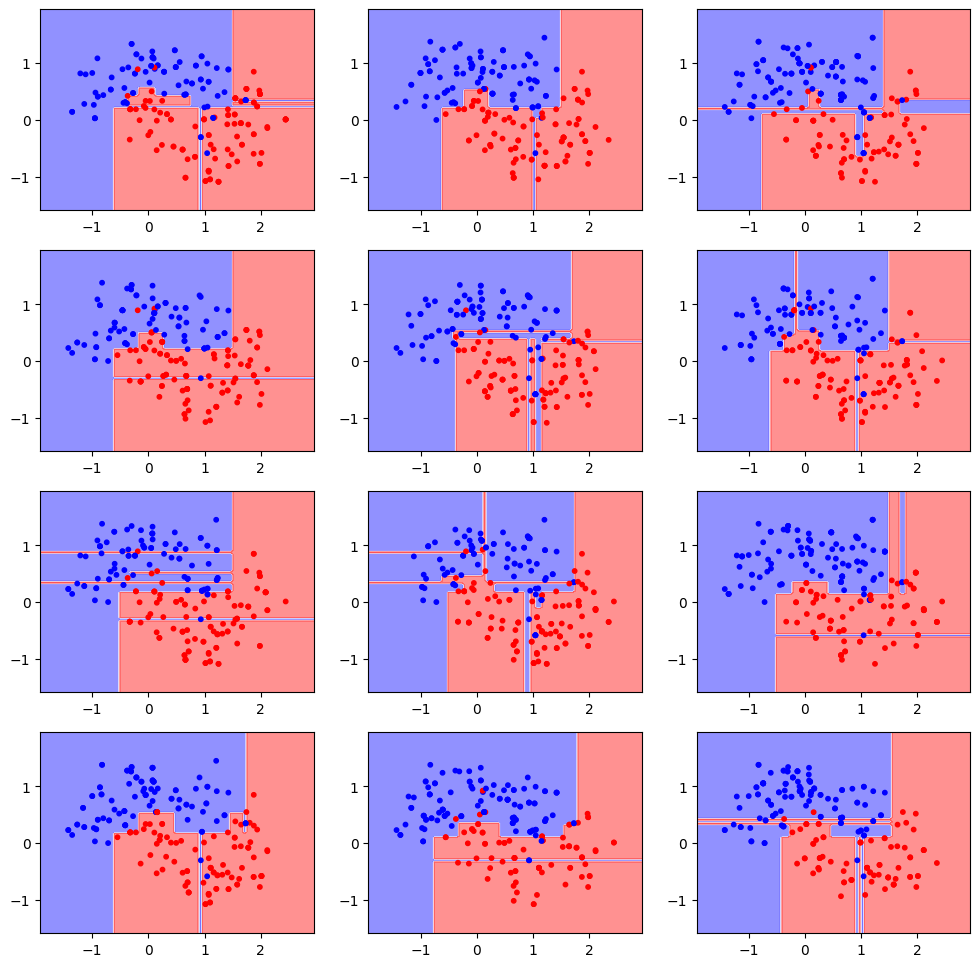

In [8]:
from sklearn.tree import DecisionTreeClassifier

npanel = 12

fig, axs = plt.subplots(4, 3, figsize=(12, 12))
axs = axs.ravel()

xx = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
yy = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100)

XX, YY = np.meshgrid(xx, yy)

for i in np.arange(npanel):
    indices_with_replacement = np.random.randint(0, len(X), len(X))
    X_new = X[indices_with_replacement]
    y_new = y[indices_with_replacement]
    # DT model with bootstrapped data
    model = DecisionTreeClassifier(random_state=i)
    model.fit(X_new, y_new)
    Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)

    axs[i].contourf(XX, YY, Z, alpha=0.5, cmap='bwr')
#    mglearn.discrete_scatter(X_new[:, 0], X_new[:, 1], y_new, ax = axs[i], s=5)
    axs[i].scatter(X_new[:, 0], X_new[:, 1], c=y_new, s=10, cmap='bwr')

plt.savefig('bootstrap_db.png',dpi=300)

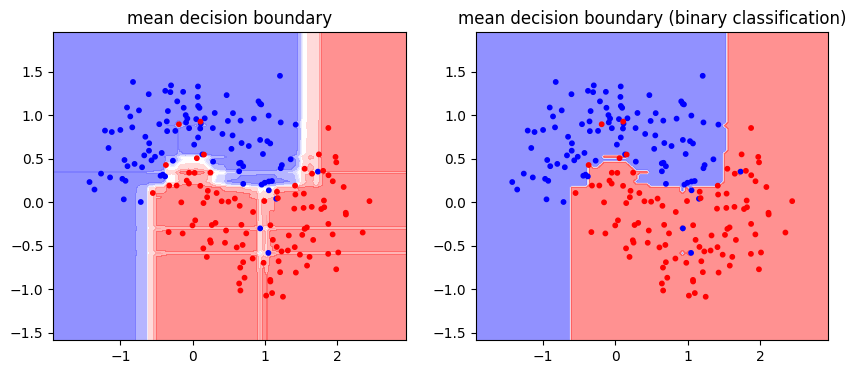

In [9]:
from sklearn.tree import DecisionTreeClassifier

npanel = 1000

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs = axs.ravel()

xx = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
yy = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100)

XX, YY = np.meshgrid(xx, yy)

# Array to save the averaged decision boundary
Zavg = np.zeros_like(XX)

for i in np.arange(npanel-1):
    indices_with_replacement = np.random.randint(0, len(X), len(X))
    X_new = X[indices_with_replacement]
    y_new = y[indices_with_replacement]
    # DT model with bootstrapped data
    model = DecisionTreeClassifier(random_state=i)
    model.fit(X_new, y_new)
    Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    Zavg += Z

    
# Average the decision boundary
Zavg /= npanel

Zavg_ = Zavg.copy()
Zavg_[Zavg <= 0.5] = 0
Zavg_[Zavg > 0.5] = 1

axs[0].contourf(XX, YY, Zavg, alpha=0.5, cmap='bwr')
axs[0].scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='bwr')
axs[0].set_title('mean decision boundary')

axs[1].contourf(XX, YY, Zavg_, alpha=0.5, cmap='bwr')
axs[1].scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='bwr')
axs[1].set_title('mean decision boundary (binary classification)')

plt.savefig('mean_db.png', dpi=300)

### BaggingClassifier

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
# See https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
    
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=1000, 
                            max_samples=1.0, bootstrap=True, random_state=0)
bag_clf.fit(X_train, y_train)
bag_clf.score(X_test, y_test)

0.96

In [11]:
from sklearn.metrics import accuracy_score

tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)
tree_clf.score(X_test, y_test)

0.82

### Decision boundary

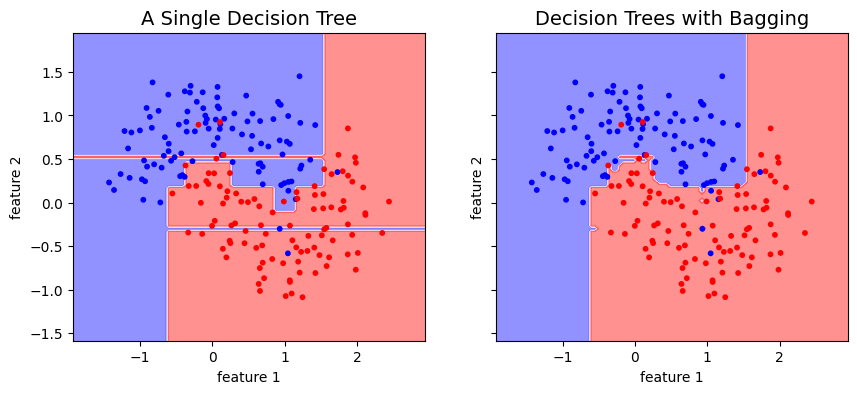

In [12]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("A Single Decision Tree", fontsize=14)

plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)

plt.show()

### Random Forests

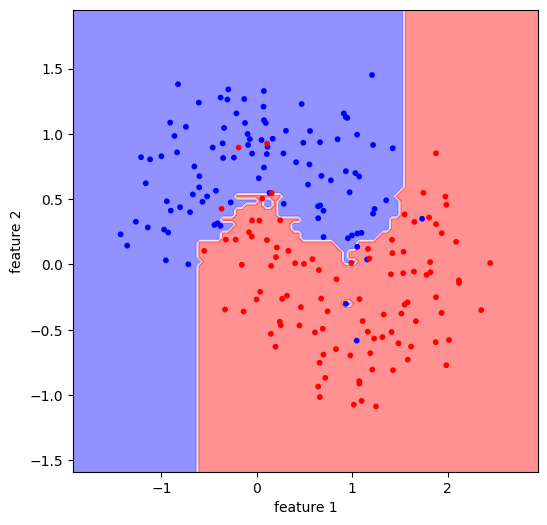

In [13]:
from sklearn.ensemble import RandomForestClassifier
#See https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

model = RandomForestClassifier(n_estimators=500, oob_score=True, n_jobs=2)
model.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(6, 6))

plot_decision_boundary(model, X, y)

### Two ways to check the accuracy

In [14]:
model = RandomForestClassifier(n_estimators=1000, oob_score=True)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.96

In [15]:
model = RandomForestClassifier(n_estimators=1000, oob_score=True)
model.fit(X, y)
model.oob_score_

0.93

### Let's try Random Forests on the MNIST data.

In [28]:
# You need to select Tensorflow kernel to load the data
from tensorflow.keras.datasets import mnist

# Load the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [29]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

###  We will take 1/50 of the data.

In [30]:
X_train = X_train[::50]
y_train = y_train[::50]
X_test = X_test[::50]
y_test = y_test[::50]

Text(0.5, 1.0, 'The number is = 5')

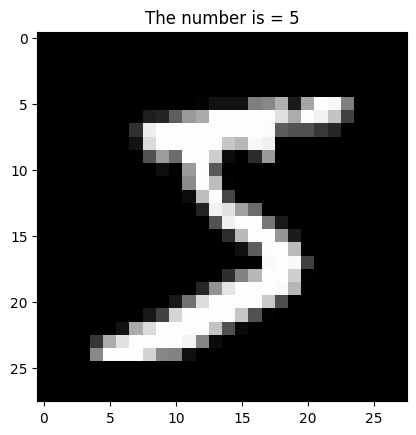

In [31]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='gray')
plt.title('The number is = {}'.format(y_train[0]))

### We will "flatten" the data, by converting a 2d array with 28x28 elements to an 1d array with 784 elements.

In [32]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

### Let's check the performance of a single DT.

### TODO: Write a script that finds the DT model using hyperparameter optimization and check the test score.

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline 

Pipeline?









Init signature: Pipeline(steps, *, memory=None, verbose=False)
Docstring:     
Pipeline of transforms with a final estimator.

Sequentially apply a list of transforms and a final estimator.
Intermediate steps of the pipeline must be 'transforms', that is, they
must implement `fit` and `transform` methods.
The final estimator only needs to implement `fit`.
The transformers in the pipeline can be cached using ``memory`` argument.

The purpose of the pipeline is to assemble several steps that can be
cross-validated together while setting different parameters. For this, it
enables setting parameters of the various steps using their names and the
parameter name separated by a `'__'`, as in the example below. A step's
estimator may be replaced entirely by setting the parameter with its name
to another estimator, or a transformer removed by setting it to
`'passthrough'` or `None`.

Read more in the :ref:`User Guide <pipeline>`.

.. versionadded:: 0.5

Parameters
----------
steps : list of tup

### TODO: Now let's check out how Random Forests perform. Compare the score obtained with test dataset and the OOB score obtained with the entire dataset.

In [33]:

model = RandomForestClassifier(n_estimators=1000, oob_score=True)
model.fit(X_train, y_train)
model.score(X_test, y_test)









0.895

In [34]:
print("Prediction: {}".format(model.predict(X_test[:10])))
print("Ground truth: {}".format(y_test[:10]))

Prediction: [7 6 6 9 8 4 6 1 2 3]
Ground truth: [7 6 6 9 3 4 4 1 2 3]


### TODO: Can you show feature importance? 

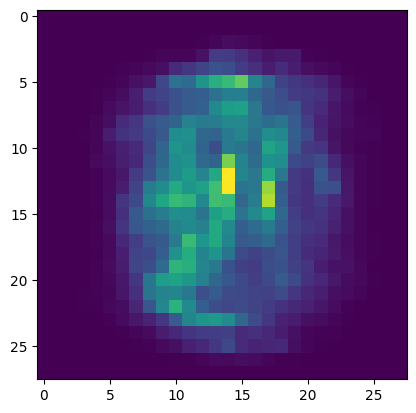

In [35]:
plt.imshow(model.feature_importances_.reshape(28,28))

### AdaBoost

In [ ]:
import sklearn
#import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

fig, ax = plt.subplots(figsize=(6, 6))

X, y = sklearn.datasets.make_moons(n_samples=500, noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=300,
                           learning_rate=0.5, random_state=0)
model.fit(X_train, y_train)
model.score(X_test, y_test)

plot_decision_boundary(model, X, y)


### Let's try AdaBoost on two Gaussians.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles
import numpy as np
import matplotlib.pyplot as plt

# Construct dataset
X1, y1 = make_gaussian_quantiles(cov=2., n_samples=200, n_features=2, 
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5, n_samples=300, n_features=2, 
                                 n_classes=2, random_state=1)

# Merge the two Gaussian
X = np.concatenate((X1, X2))
# We reverse the class of y2
y = np.concatenate((y1, - y2 + 1))

fig, ax = plt.subplots(figsize=(6, 6))

#mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='bwr')

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")

### What ML algorithm do you think would work the best? SVM!

### TODO: Find the best SVM model using hyperparameter optimization.

### TODO: Plot the decision boundary.

### SVM did a good job as we expected. What about DT?

### TODO: Find the best (single) DT model using hyperparameter optimization.

### TODO: Plot the decision boundary.

### Single DT did okay. Now, let's check out DT with AdaBoost.

In [ ]:
# We want a poor base estimator, so we will use max_depth = 1
model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), algorithm="SAMME", 
                           n_estimators=200, random_state=0)

model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
plt.figure(figsize=(6, 4))

# Plot the decision boundaries
plot_decision_boundary(model, X, y)


### Hyperparameter Optimization for AdaBoost

In [ ]:
#param_grid = {'n_estimators': [10, 50, 100, 500, 1000],
#              'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]}


param_grid = {'base_estimator__max_depth': [3, 5, 10],
              'n_estimators': [10, 50, 100, 200],
              'learning_rate': [0.001, 0.01, 0.1, 1.0]}

grid_search = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), 
                                              algorithm="SAMME", random_state=0), 
                           param_grid, cv=5, return_train_score=True, verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))

In [ ]:
plt.figure(figsize=(6, 4))

# Plot the decision boundaries
plot_decision_boundary(grid_search.best_estimator_, X, y)


### The problem with outliers: we will use exactly the same two Gaussian dataset, but with an outlier.

In [ ]:
# Construct dataset
X1, y1 = make_gaussian_quantiles(cov=2., n_samples=200, n_features=2, 
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5, n_samples=300, n_features=2, 
                                 n_classes=2, random_state=1)

# Merge the two Gaussian
X = np.concatenate((X1, X2))
# We reverse the class of y2
y = np.concatenate((y1, - y2 + 1))

# These are the outliers.
X_out = np.array([[0, 0], [0.1, 0.1], [-0.1, -0.1]])
y_out = np.array([1, 1, 1])

X = np.concatenate((X, X_out))
y = np.concatenate((y, y_out))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

fig, ax = plt.subplots(figsize=(6, 6))

#mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='bwr')

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")

In [ ]:
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10), algorithm="SAMME", 
                           n_estimators=200, random_state=0)

model.fit(X_train, y_train)
print(model.score(X_test, y_test))

plt.figure(figsize=(6, 4))

# Plot the decision boundaries
plot_decision_boundary(model, X, y)


### What about Random Forests? Does RF have the same problem?

### TODO: Build a RF model and make a plot showing the decision boundary.

### Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

plt.plot(X, y, 'b.')

### Building a GBR model.

In [ ]:
model = GradientBoostingRegressor(max_depth=2, n_estimators=20, learning_rate=1.0, random_state=42)
model.fit(X, y)

In [ ]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)
    
fix, ax = plt.subplots(figsize=(6,4))

plot_predictions([model], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")

plt.title("learning_rate={}, n_estimators={}".format(model.learning_rate, model.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

In [ ]:
max_depth = 2
n_estimators = 30

model = GradientBoostingRegressor(max_depth=max_depth, n_estimators=n_estimators, 
                                  learning_rate=1, random_state=42)
model.fit(X, y)

model_slow = GradientBoostingRegressor(max_depth=max_depth, n_estimators=n_estimators, 
                                       learning_rate=0.1, random_state=42)
model_slow.fit(X, y)

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

plt.sca(axes[0])
plot_predictions([model], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(model.learning_rate, model.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.sca(axes[1])
plot_predictions([model_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(model_slow.learning_rate, model_slow.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)


### Gradient Boosting with Early stopping

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=49)

model = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
model.fit(X_train, y_train)

#Here, "staged_predict" gives the prediction at each stage.
errors = [mean_squared_error(y_test, y_pred) for y_pred in model.staged_predict(X_test)]
best_n_estimators = np.argmin(errors) + 1

model_best = GradientBoostingRegressor(max_depth=2, n_estimators=best_n_estimators, random_state=42)
model_best.fit(X_train, y_train)

In [ ]:
plt.figure(figsize=(10, 4))

min_error = np.min(errors)

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([best_n_estimators, best_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(best_n_estimators, min_error, "ko")
plt.text(best_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([model_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % best_n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)

### Should we run all the models to find the best model? We can stop early.

In [ ]:
#When warm_start is set to True, reuse the solution of the previous call to fit 
#and add more estimators to the ensemble, otherwise, just erase the previous solution.

#See https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#

model = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
error_tolerance = 5

for n_estimators in range(1, 120):
    model.n_estimators = n_estimators
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    val_error = mean_squared_error(y_test, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == error_tolerance:
            model.n_estimators = n_estimators - error_tolerance
            break  # early stopping

In [ ]:
print(model.n_estimators)
print("Minimum validation MSE:", min_val_error)

In [ ]:
model_best = GradientBoostingRegressor(max_depth=2, n_estimators=model.n_estimators, random_state=42)
model_best.fit(X_train, y_train)

plot_predictions([model_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % model.n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)